# Towards fair machine learning: lessons from statistics

** My reason for writing this:  I've been reading up on the topic, and everywhere, I read that we should NEVER NEVER include race and gender in a predictive model.  It is also present in many policies, where companies are prohibited from including variables as race and gender.  I don't agree.  We know that correlated variables will be taken as proxy for these models and further increase bias.  I believe we should include it in the model, but not in the prediction. **

Companies increasingly rely on artificial intelligence to make decisions about our everyday life, based on all information they can collect about us.  Some examples:
- getting a loan
- college admissions
- job interviews
- financial aid
- salary
- ...

## Introduction: bias and inequality in machine learning

**TL:DR: there are biases for historic reasons that shouldn't be there (anymore).**

It is a known fact that in all of those decisions, a certain historical unfairness exists.  Women get a lower salary than men, and black people are having far more trouble getting all of the above than white people.
We can always find reasons for this bias: women work more part time and don't aim for high-paid careers, black people come from poorer backgrounds and have therefore a lower chance of being able to pay back their loans.  Even though those are real reasons, it should be clear that this bias shouldn't exist after we carefully take into account those variables.  However that is not what happens.

**TL:DR: there is a relation between race and college admissions that is impossible to quantify.**

Let's take the example of race and college admissions.  In its simplest form, college admissions is based on SAT scores.  We know that black kids on average have lower SAT scores.  There are a large number of reasons: black kids often have poorer backgrounds (an effect that can even be traced back to the time of slavery, where white people were accumulating capital), their parents didn't go to college (an effect that can easily be traced back to their poorer backgrounds),...  Those reasons are observable, and therefore we can take those variables into account when we try to measure the difference between black and white kids.  However, even if we try to correct for all these factors, differences still exist.  One reason is that there are many more reasons for inequality due to unmeasurable influences.  For example the presence of role models \* is impossible to measure, but can have a huge effect.  
As such: at this point, it is very hard to ensure equal opportunities and it often needs manual correction (affirmative action) to correct this injustice.

_\*A month ago, I was at a devops workshop (devops = systems for unifying IT development).  It was my first devops event, so I was eager to meet my peers.  I was the **only** woman.  The only other women in the room were there for catering.  What example did this give me?  It showed me implicitly that I had a far greater chance to end up in catering than in devops.  Maybe I have a better chance at succeeding in life if I go for a catering job than a devops career.
This is a simplified example, but it is a situation that occurs in the lives of black people from the moment they are born, and it is very hard to impossible to measure._

**TL:DR: machines will continue the bias.  If we don't include the bias variable, the machine will find a proxy (eg. ZIP-codes are a proxy for race).**

How when we hand over the decisions to artificial intelligence, we let the computer decide how we can optimise the chance of success in college.  If we include race in our model, the machine will likely estimate that it's better to admit more white kids than black kids, since they historically have a higher chance of success.  It is clear that this approach is morally and ethically wrong.  Therefore, specialists in the field urge to not include race in their prediction models.
What then happens is that instead of using the variable `race` as a predictor, the model will find other variables that are related to race as a proxy.  For example it will take the `ZIP-code` of the person.  There shouldn't be an influence of ZIP-code on the success rate of kids in college, but because certain ZIP-codes have higher concentrations of black or white people, the variable `ZIP-code` might indeed be a predictor of college success **based on a racial bias**.

## Introduction: correct for confounding in statistics

#### Statistics vs machine learning
_While there is still a lot of discussion about the difference, I will make an attempt.  It is probably wrong._


**TL:DR: stats is estimation, machine learning is prediction**

Machine learning and statistics are two heavily related domains.  Both try to mathematically model a part of the reality.  The models used in machine learning were mostly developed in the 60's-70's in statistics.  
Their difference is mostly related to the goal of the model: where statistics is more occupied with estimating the effects as true as possible, and inferring if a predictor is truly related to the outcome, machine learning tries to optimally predict the outcome.
A simple example from my own background:
- **Statistical question:** Can we see the impact of using heroin in brain images?  How are brain images different between people who use heroin and people who didn't?  What is the chance that we see these differences due to random chance?
- **Machine learning question:** In how many cases can we successfully predict whether someone uses heroin based on the brain images?

Both have very interesting applications.  The statistical question is crucial for basic science: to collect information about how the brain works.  The second question is more important for clinical applications when we are trying to diagnose patients.
(although it doesn't always have to be basic vs clinical science)

#### Confounding

**TL:DR: In stats, we include confounding variables to attribute variance to the correct variable; this concept is absent in ML.**

In the first question, we clearly want to separate random chance from the question of interest (the heroin).  If we now know that men use heroin much more than women, we probably want to take that into account.  If we don't, we might publish a paper that tells us that brains are different between heroin addicts and healthy subjects, while in fact we are just saying that there is a difference between men and women.

One such example can be observed in kids with ADHD: we can see very strong differences between the brain connectivity patterns of kids with ADHD and kids without.  However, upon closer inspection, it seems that the difference is not in the brain itself, but more in how we measure it.  Kids with ADHD move more in the scanner, and we can also see this motion in the brain scans.  If we take into account the motion in the model, we can correctly attribute the differences in brain scans to motion, and not to the disease.

However, if our only goal is to predict whether a kid has ADHD or not, as is the case in machine learning, based on all available data, we don't care too much which variables are in fact leading to this prediction.  Our machine tries to optimise the correct classification.  The more data we have, the better the machine will be.  In machine learning, we want to include as many variables as technically possible and there is no notion of confounding variables.

#### Bias in machine learning equals confounding in statistics

** TL:DR race can be a confounding variable, and as such still have an impact on results, even if we don't include it in the model.**
At this point, the literature suggests that we should **never** include variables as `race` and `gender` in a predictive model if we assume that there are no real differences, only biases.  However, in the example above (race - zip-codes), our machine will draw the conclusion that based on our zip-code, we can better predict college outcomes, thus there is a relationship between zip-code and college outcome.  In fact, we argued that this relationship is in fact due to race.  But our teachers tell us that we shouldn't measure or include race in our model because it introduces bias.
This situation is the same as the relationship between ADHD and brain scans: we see a strong relationship, but it was in fact related to the unmeasured variable of motion.
As such, if we don't include the variable race in our model, there will still be racial bias.  Only this time it will be induced by variables correlated to race.

**For the reader who knows their models:**

This can be seen even stronger in deep learning.  If we don't include `race` or `gender` in the model, it is very well possible that one of the nodes in the model will represent race or gender.  In other words: since there are such strong relationships (biases) based on race or gender, the model tries to estimate race and gender on the basis of proxies.

## My proposal: include confounders in the model, but leave them out in the prediction (i.e. handle them as missing values).

More and more policy regulations dictate that it is now illegal to collect variables that could be a basis for bias.  However, I want to argue that it is **better to include variables related to known biases into the model** such as gender and race, but **remove these variables from the predictions by setting the variables as missing values**.  If not, the model will use correlated regressors to capture the bias and reestablish the bias through this proxy.  I will use as an example how ZIP codes are used to induce bias.  As I will show below, modeling the confounder is the only way to correctly deal with (and remove) bias. 

Another idea could be to regress the variable of bias (race, gender) onto the other variables, to make them orthogonal.  This process is very popular in neuroscience and comes with its own discussion, but it could be very valuable in **making sure no variable in the final model will carry (part of the correlated) bias**.


#### Potential for policy making

At this point, many companies are prohibited from collecting data on race or gender to reduce bias.  If we would use this method, it would effectively mean that the subjects loose privacy.  However, it would be fairly easy to (1) demand that these variables are not used in any predictive model; and (2) to check that this is indeed the case.  To verify that companies indeed estimate bias but don't use it in their predictions, we would just have to look at the resulting bias, which should be exactly 0 (marginally over different conditions).

## Simulation study

The concept of the simulation is the following: we try to automate college admissions on the basis of 300 variables that have a relationship with the outcome and thus serve to predict the outcome.
We also include a racial bias in the data: black people have a lower admission rate in the data.  (Since this is merely an illustration, I'm only including black and white.  That is obviously not the full picture).
Furthermore we include ZIP-codes for 100 cities.  The ZIP-codes have no direct relationship with the admission rate, but the proportion of black/white people differ between 10\% and 90\%. 

We start by defining the parameters that are fixed and chosen by the researcher and reading in the necessary libraries.

In [1]:
# parameters

nzip = 100
populations = [50,500]
blackadm = 0.2
whiteadm = 0.4
othervars = 300
proportions_zip = [0.1,0.9]
varcor = 0.2
varvar = 1

In [2]:
from __future__ import division
from sklearn.model_selection import learning_curve, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import string
import copy

%matplotlib inline

First we write a function to generate random zip-codes.  This will be our variable that is confounded by race.

In [3]:
def randomZIP():
    letters = "".join(np.random.choice([x for x in string.ascii_uppercase],2))
    numbers = "".join([str(x) for x in np.random.choice(range(10),5)])
    return letters + numbers

randomZIP()

'GC79253'

Now we create a table with `nzip` zipcodes that each have a certain population and a certain proportion of black/white people.

In [4]:
zip_table = pd.DataFrame({
    "zip":[randomZIP() for x in range(nzip)],
    "zip_race":np.random.uniform(low=proportions_zip[0],high=proportions_zip[1],size=nzip),
    "zip_population":np.random.randint(low = populations[0], 
                                       high=populations[1], 
                                       size=nzip, 
                                       dtype='l')
})

zip_table.head()

,zip,zip_population,zip_race
0,GG40234,164,0.761389
1,QD33761,119,0.630542
2,TJ18838,312,0.543448
3,DN69923,147,0.478437
4,BP32630,405,0.303050


Now we generate the full data table, with `nzip` variables to denote the zip-code, `race` and `othervars` variables that ar all correlated with factor `varcor` and variance `varvar`.

In [5]:
out = pd.DataFrame({"race":[]})

for idx,row in zip_table.iterrows():
    white = int(np.round(row.zip_population*row.zip_race))
    newdict = {
        'race':[1]*white + int(row.zip_population-white)*[0],
        row.zip:[1]*row.zip_population
        }
    out = out.append(pd.DataFrame(newdict),ignore_index=True)

mns = np.array([0]*othervars)
var = np.zeros([othervars,othervars])+varcor
np.fill_diagonal(var,varvar)
others = np.random.multivariate_normal(mns,cov=var,size=len(out))
others = (others>0)*1
for x in range(othervars):
    out['var_%i'%x] = others[:,x]

out = out.fillna(0)
print(out.head(2))
print(out.shape)

   AC11447  AV05170  BI01196  BI26506  BL94655  BP32630  CF14223  CH26676  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   

   CK32063  CT13018   ...     var_290  var_291  var_292  var_293  var_294  \
0        0        0   ...           0        1        1        0        0   
1        0        0   ...           1        0        0        1        1   

   var_295  var_296  var_297  var_298  var_299  
0        1        1        0        1        0  
1        1        1        1        1        0  

[2 rows x 401 columns]
(24065, 401)


We now generate the admission variable.  The effect ($\beta$) of the 300 variables ranges uniformly between -0.4 and 0.4.  Race has a coefficient $\beta$ of 1.  Zip codes have a coefficient of $\beta=0$.

In [6]:
# get Y
betas = np.random.uniform(-0.4,0.4,out.shape[1])
raceid = np.where(out.columns=='race')[0][0]
betas[raceid] = 1
betas[:nzip] = 0
y = np.dot(betas,np.transpose(np.array(out)))
y = (y - np.mean(y))/np.std(y)
y = y+np.random.normal(0,1,len(y))
y = np.array([1 if x>np.median(y) else 0 for x in y])

To compute racial bias, we compute the odds ratio.  An odds ratio close to 0 indicates strong bias (lower admission for black people), an odds ratio of 1 means no bias.  Any value higher than 1 indicates bias in favor of black people.

In [7]:
def compute_OR(test,confounder):
    black = test[confounder==0]
    white = test[confounder==1]
    num = np.sum(black==1)/np.sum(white==1)
    denom = np.sum(black==0)/np.sum(white==0)
    OR = num/denom
    return OR

We'll use a logistic regression with L2 regularisation for the prediction.

In [8]:
lr = LogisticRegression(dual=False,penalty="l2",
                        solver='liblinear',C=0.2,class_weight='balanced')

Below we are modeling the data:

- We are looping over a range of samplesizes (500-5000):

    - We are looping over different subsets of samplesize (to get an idea of the variance of our results):
        
        - We are taking 3 modeling approaches:
            1. We include race in our estimation *and* prediction
            2. We don't include race in the model
            3. We include race in our estimation, but set race to *missing values* in our prediction.  The model thus estimates bias but is blind for race when predicting admission for a certain person.
        - We compute the accuracy of the prediction both in the training and the test set.
        - We compute the bias by means of the odds ratio

In [9]:
results = pd.DataFrame({"accuracy_test":[],
                        "bias":[],
                        "condition":[],
                        "samplesize":[],
                        "subject":[],
                        "accuracy_train":[]})

for samplesize in np.arange(1000,10000,500):
    k = 0
    print(samplesize)
    for idx in range(500):
        sample = np.random.choice(range(len(out)),samplesize)
        train_index = sample[:int(samplesize/2)]
        test_index = sample[int(samplesize/2):]
        Xtrain = out.iloc[train_index]
        ytrain = y[train_index]
        Xtest = out.iloc[test_index]
        ytest = y[test_index]
        racetest = out['race'][test_index]
        # get training and test datasets without race --> set to missing values (0.5)
        cols = set(Xtrain.columns) - set(['race'])
        Xtrain_norace = copy.deepcopy(Xtrain)
        Xtrain_norace['race'] = 0.5
        Xtest_norace = copy.deepcopy(Xtest)
        Xtest_norace['race'] = 0.5 
        # loop over sets
        sets = [
            (Xtrain,ytrain,Xtest,ytest),
            (Xtrain_norace,ytrain,Xtest_norace,ytest),
            (Xtrain,ytrain,Xtest_norace,ytest)
        ]
        names = ['with race','without race','confounding']
        for idx,(Xtrain,ytrain,Xtest,ytest) in enumerate(sets):  
            k = k+1
            ft = lr.fit(Xtrain,ytrain)
            ypred = ft.predict(Xtest)
            ypred_train = ft.predict(Xtrain)
            acc = np.sum(ypred == ytest)/len(ytest)
            acc_train = np.sum(ypred_train == ytrain)/len(ytrain)
            OR = compute_OR(ypred,racetest)
            newrow = {
                "accuracy_test":acc,
                "accuracy_train":acc_train,
                "bias": OR,
                "condition": names[idx],
                "samplesize": int(samplesize/2),
                "subject": k
            }
            results = results.append(newrow,ignore_index=True)

results.to_csv("simulations_fair_ML.csv")

1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


### Results: bias and accuracy

In the figure below, it is seen that the worst bias coincides with the largest accuracy.  That is no surprise, since the biasing variable indeed carries predictive value.  It can also be seen that leaving out the biasing variable significantly reduces the bias, but it does not remove it.  The only way to remove the bias, is by including the biasing variable as predictor in the estimation, but not in the prediction.

/home/jdurnez/.conda/envs/my_root/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


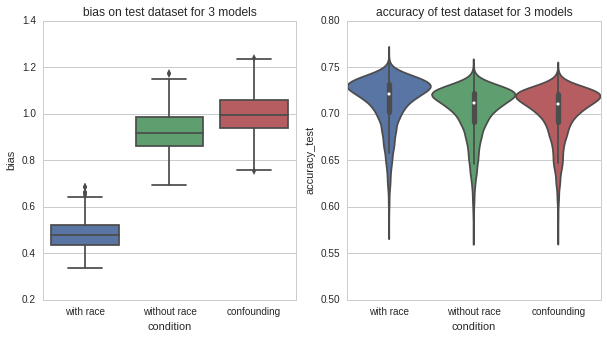

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='condition',y='bias',data=results[results.samplesize==2000])
plt.title("bias on test dataset for 3 models")
plt.subplot(1,2,2)
sns.violinplot(x='condition',y='accuracy_test',data=results,width=1)
plt.title("accuracy of test dataset for 3 models")
plt.savefig("bias_and_accuracy.pdf")

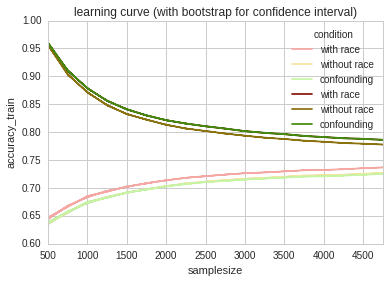

In [11]:
sns.set_style('whitegrid')
sns.tsplot(data=results, time="samplesize",unit='subject',
           condition="condition", value="accuracy_test",color = sns.hls_palette(8,l=0.8,s=0.8),
        err_style="boot_traces",n_boot=1000)
sns.tsplot(data=results, time="samplesize",unit='subject',
          condition="condition", value="accuracy_train",color = sns.hls_palette(8,l=0.3,s=0.8),
          err_style="boot_traces",n_boot=1000)
plt.title("learning curve (with bootstrap for confidence interval)")
plt.savefig("learning_curves.pdf")